Shape del data frame:
(92502, 13)
Head del data frame:
          user_name         user_location  \
2   Time4fisticuffs      Pewee Valley, KY   
3       ethel mertz  Stuck in the Middle    
4          DIPR-J&K     Jammu and Kashmir   
5  🎹 Franz Schubert           Новоро́ссия   
6      hr bartender       Gainesville, FL   

                                    user_description        user_created  \
2  #Christian #Catholic #Conservative #Reagan #Re... 2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ... 2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf... 2017-02-12 06:45:15   
5  🎼  #Новоро́ссия #Novorossiya #оставайсядома #S... 2018-03-19 16:29:52   
6  Workplace tips and advice served up in a frien... 2008-08-12 18:19:49   

   user_followers  user_friends  user_favourites  user_verified  \
2            9275          9525             7254          False   
3             197           987             1488          False   
4          10100

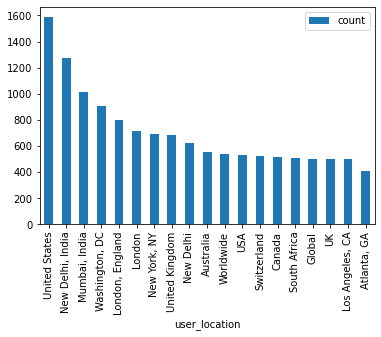

Estos son los top 10 Users
                user_name  count
16527  GlobalPandemic.NET    283
6001   Blood Donors India    260
18010     Hindustan Times    245
18435         IANS Tweets    217
30940                 OTV    203
36636      Sambad English    167
7242          COVID Scale    164
1209                  ANI    161
957          ABS-CBN News    151


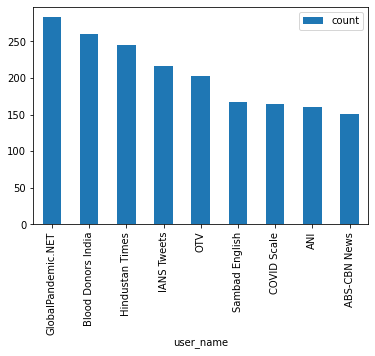

In [1]:
from datetime import date
import pandas as pd 
import matplotlib.pyplot as plt

FILENAME = 'Dataset/covid19_tweets.csv'
df = pd.read_csv(FILENAME)

df["user_name"] = df['user_name'].astype('string')
df["user_location"] = df['user_location'].astype('string')
df["user_description"] = df['user_description'].astype('string')
df["user_created"] = df['user_created'].astype('datetime64[ns]')
df["date"] = df['date'].astype('datetime64[ns]')

df["user_name"] = df['user_name'].str.lstrip()
df["user_location"] = df['user_location'].str.lstrip()
df["user_description"] = df['user_description'].str.lstrip()

df = df.dropna(axis = 0)

def agrupa_rt_location(df):
    #filtrar los que no son retweet
    df_isrt = df['is_retweet'] == False
    df_filtrado = df[df_isrt]
    df_grouped = df_filtrado.groupby(['user_location']).size().reset_index(name="count")
    df_order = df_grouped.sort_values(['count'],ascending=[False])
    df_order = df_order.iloc[1:20,:]
    return df_order

df_filter = agrupa_rt_location(df)

print(f'El data frame filtrado con el top 20 de ciudades \n{df_filter}')

df_filter.plot(kind='bar',x='user_location',y='count')
plt.show()

#- Crea una función que muestre cuales son los usuarios que han publicado más tweets.

def agrupa_top_user(df):
    #filtrar los que no son retweet
    df_grouped = df.groupby(['user_name']).size().reset_index(name="count")
    df_order = df_grouped.sort_values(['count'],ascending=[False])
    df_order1 = df_order.iloc[1:10,:]
    return df_order1

top_user = agrupa_top_user(df)

print(f'Estos son los top 10 Users\n{top_user}')
top_user.plot(kind='bar',x='user_name',y='count')
plt.show()